<a href="https://colab.research.google.com/github/saipraveen333/Day6_ML/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
data=pd.read_csv('/content/loan_prediction.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [73]:
data.shape

(614, 13)

In [8]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [12]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [98]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

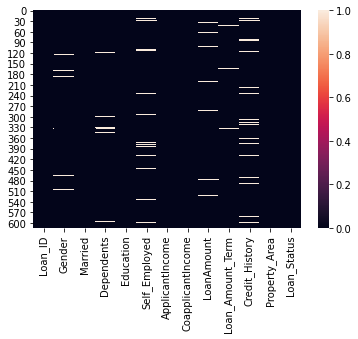

In [17]:
sns.heatmap(data.isnull())

In [99]:
data.drop('Loan_ID',axis=1,inplace=True)
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


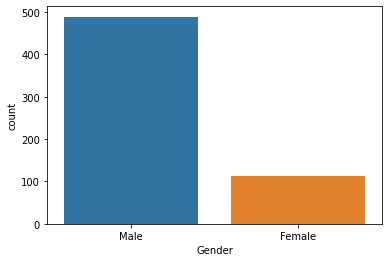

In [100]:
sns.countplot(data['Gender'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


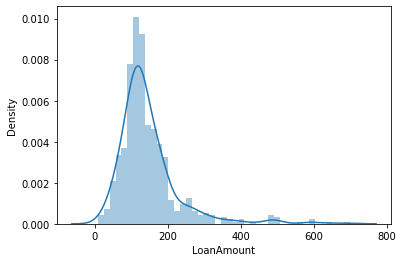

In [101]:
sns.distplot(data['LoanAmount'])

In [102]:
data.fillna({'Gender':'Male',
             "Married":"Yes",
             'Dependents':'0',
             'Self_Employed':'No',
             'LoanAmount':data['LoanAmount'].mean(),
             'Loan_Amount_Term':data['Loan_Amount_Term'].mean(),
             'Credit_History':'1'},inplace=True)
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [103]:
data['Loan_Status']=data['Loan_Status'].map({'Y':1,'N':0})
cat_cols=['Gender','Married','Dependents',"Education",'Self_Employed','Property_Area']
df=pd.get_dummies(data[cat_cols],drop_first=True)
df
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1,Urban,1


In [111]:
num_cols=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
data[num_cols]=scale.fit_transform(data[num_cols])
df_1=pd.concat([df,data],axis=1)
df_1.head()
df_1.drop(['Gender','Married','Education','Self_Employed','Property_Area'],axis=1,inplace=True)

In [112]:
df_1['Loan_Status'].isnull().sum()
df_1

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,1,0,0,0,0,0,0,0,1,0,0.070489,0.000000,0.198860,0.743590,1,1
1,1,1,1,0,0,0,0,0,0,1,0.054830,0.036192,0.172214,0.743590,1,0
2,1,1,0,0,0,0,1,0,1,0,0.035250,0.000000,0.082489,0.743590,1,1
3,1,1,0,0,0,1,0,0,1,0,0.030093,0.056592,0.160637,0.743590,1,1
4,1,0,0,0,0,0,0,0,1,0,0.072356,0.000000,0.191027,0.743590,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,0,0,0,0,0.034014,0.000000,0.089725,0.743590,1,1
610,1,1,0,0,1,0,0,0,0,3+,0.048930,0.000000,0.044863,0.358974,1,1
611,1,1,1,0,0,0,0,0,1,1,0.097984,0.005760,0.353111,0.743590,1,1
612,1,1,0,1,0,0,0,0,1,2,0.091936,0.000000,0.257598,0.743590,1,1


In [128]:
x = df_1.drop('Loan_Status', axis = 1)
y = df_1['Loan_Status']
x.replace({'3+':'0'},inplace=True)
print([x['Dependents_3+']])

[0      0
1      0
2      0
3      0
4      0
      ..
609    0
610    1
611    0
612    0
613    0
Name: Dependents_3+, Length: 614, dtype: uint8]


In [129]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)
x_train

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
565,1,1,0,0,0,1,0,0,0,0,0.053395,0.000000,0.160637,0.743590,1
586,1,1,0,0,0,0,0,0,1,0,0.026555,0.036528,0.137482,0.743590,1
60,1,1,0,0,0,0,0,0,1,0,0.029066,0.091103,0.160637,0.743590,1
245,1,0,0,0,0,0,1,0,1,0,0.072975,0.103991,0.160637,0.358974,1
289,1,0,0,0,0,0,0,0,0,0,0.115745,0.000000,0.257598,0.743590,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51,0,0,0,0,0,0,0,1,0,0,0.036314,0.000000,0.160637,0.743590,1
528,1,0,1,0,0,1,0,1,0,1,0.031280,0.031248,0.123010,0.743590,1
300,1,1,0,0,0,1,0,0,1,0,0.020408,0.070415,0.121563,0.743590,0
485,1,1,1,0,0,1,0,0,0,1,0.022362,0.058464,0.176556,0.743590,1


In [134]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y=lr.predict(x_train)
y

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [139]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score, precision_score, recall_score
print(accuracy_score(y,y_train))
accuracy_score(lr.predict(x_test),y_test)

0.8207739307535642


0.7723577235772358

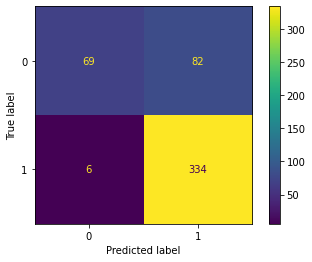

In [141]:
plot_confusion_matrix(lr, x_train, y_train)

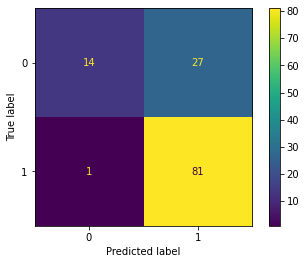

In [149]:
plot_confusion_matrix(lr, x_test, y_test, values_format= "d")